In [1]:
import os
import sys
HOME = os.path.abspath('..')
sys.path.append(HOME)
os.chdir(HOME)
import torchvision
import dlib
from PIL import Image
from imutils import face_utils
from src.data.dataprep import *
from src.data.imgutils import *
from src.features.features_extractors import *

In [2]:
HOME

'/Users/samirchar/Google_Drive/Masters/DSI Scholars/stroke_detection'

In [46]:
DUMMY_DATA_PATH = 'data/dummy_data/'
DUMMY_DATA_2_PATH = DUMMY_DATA_PATH+'samir/'
video = torchvision.io.read_video('data/raw/3_face_smile.mov')

In [49]:
video[2]

{'video_fps': 29.967891544773458, 'audio_fps': 44100}

In [50]:
frames = video[0].transpose(1,2)

In [51]:
num_frames,H,W,C = frames.size()
print(num_frames)

280


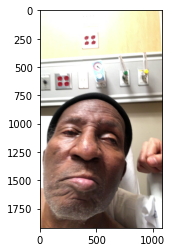

In [52]:
plt.imshow(frames[0])

In [17]:
landmarks_left_to_right_mapping = {  
                                     0: 16,#
                                     1: 15,#
                                     2: 14,#
                                     3: 13,#
                                     4: 12,#
                                     5: 11,#
                                     6: 10,#
                                     7: 9,#
                                     17: 26,
                                     18: 25,
                                     19: 24,
                                     20: 23,
                                     21: 22,
                                     36: 45,
                                     37: 44,
                                     38: 43,
                                     39: 42,
                                     40: 47,
                                     41: 46,
                                     31: 35,
                                     32: 34,
                                     48: 54,
                                     49: 53,#
                                     50: 52,#
                                     60: 64,#
                                     61: 63,#
                                     67: 65,#
                                     59: 55,#
                                     58: 56#
                                }



bo = BarycentricOperations(landmarks_left_to_right_mapping,
                           triangle_indices = [68,69,70])

In [53]:
shape_predictor = "models/landmarks/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
#detector = DNNDetector() #10x faster than dlib face detector and more accurate.
predictor = dlib.shape_predictor(shape_predictor)


In [11]:
test_images = {}

test_images['control_smile']=np.array(Image.open(DUMMY_DATA_2_PATH+'control_smile.jpeg'))

test_images['stroke_left_smile']=np.array(Image.open(DUMMY_DATA_2_PATH+'stroke_left_smile.jpeg'))
test_images['stroke_right_smile'] = np.array(Image.open(DUMMY_DATA_2_PATH+'stroke_right_smile.jpeg'))

test_images['control_eyebrow_lift'] = np.array(Image.open(DUMMY_DATA_2_PATH+'control_eyebrow_lift_v3.jpeg'))
test_images['stroke_eyebrow_lift'] = np.array(Image.open(DUMMY_DATA_2_PATH+'stroke_eyebrow_lift_v3.jpeg'))
test_images['rotated_face']=np.array(Image.open(DUMMY_DATA_2_PATH+'rotated_face_v2.jpeg'))



In [12]:
'''from deepface import DeepFace
backends = ['opencv', 'ssd', 'dlib', 'mtcnn']
p = 'dummy_data/samir/stroke_left_smile.jpeg'
DeepFace.detectFace(p, detector_backend = backends[2])

from deepface.commons import functions
img = functions.load_image(p)
backends = ['opencv', 'ssd', 'dlib', 'mtcnn']

detected_face = functions.preprocess_face(img = img, detector_backend = backends[2],return_region=True)

img = detected_face[0][0]
gray_img = img_2_gray_scale(img)

rects = detector(gray_img,1)

img_drawn,faces = draw_landmarks(predictor,
                                 img,
                                 gray_img,
                                 rects,
                                 selected_landmarks,
                                 landmark_radius=1,
                                 return_faces = True)
show_image_local(img_drawn)

processed_landmarks = faces['face_0']['landmarks']

nose_mouth_features_ = nose_mouth_features(processed_landmarks)
lmnx,lmny,lmnd,theta,rmnx,rmny,rmnd,phi = nose_mouth_features_
print(f'nose_mouth_angles: {theta,phi}')
'''

"from deepface import DeepFace\nbackends = ['opencv', 'ssd', 'dlib', 'mtcnn']\np = 'dummy_data/samir/stroke_left_smile.jpeg'\nDeepFace.detectFace(p, detector_backend = backends[2])\n\nfrom deepface.commons import functions\nimg = functions.load_image(p)\nbackends = ['opencv', 'ssd', 'dlib', 'mtcnn']\n\ndetected_face = functions.preprocess_face(img = img, detector_backend = backends[2],return_region=True)\n\nimg = detected_face[0][0]\ngray_img = img_2_gray_scale(img)\n\nrects = detector(gray_img,1)\n\nimg_drawn,faces = draw_landmarks(predictor,\n                                 img,\n                                 gray_img,\n                                 rects,\n                                 selected_landmarks,\n                                 landmark_radius=1,\n                                 return_faces = True)\nshow_image_local(img_drawn)\n\nprocessed_landmarks = faces['face_0']['landmarks']\n\nnose_mouth_features_ = nose_mouth_features(processed_landmarks)\nlmnx,lmny,lmn

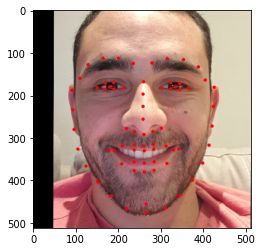

nose_mouth_angles: (42.38045120460532, 39.8055710922652)
eyebrow horizontal deviations: [0.49821161261364194, 1.3019526725788753]
barycentric asymmetry: 0.05465154744364835




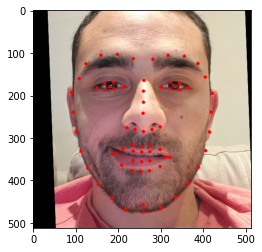

nose_mouth_angles: (52.750036422919294, 58.79380861217655)
eyebrow horizontal deviations: [0.9628636256362129, 1.2453642667683473]
barycentric asymmetry: 0.12642114081935468




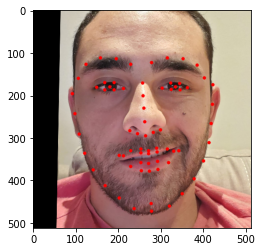

nose_mouth_angles: (52.7835595264654, 40.36453657309736)
eyebrow horizontal deviations: [0.9548412538721887, 4.6668583714389955]
barycentric asymmetry: 0.21932524240955614




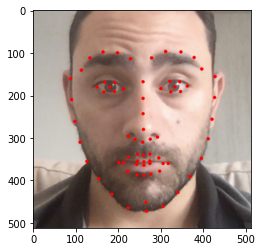

nose_mouth_angles: (53.36588612403259, 54.05788812861766)
eyebrow horizontal deviations: [1.5207696611437658, 2.33730585912382]
barycentric asymmetry: 0.05478589212053485




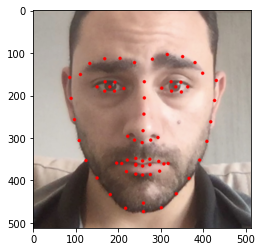

nose_mouth_angles: (50.792796495032164, 52.53944513950931)
eyebrow horizontal deviations: [4.635463426902643, 10.7842978675626]
barycentric asymmetry: 0.03895805680485076




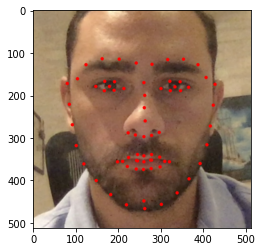

nose_mouth_angles: (55.89872580575286, 59.30027744918559)
eyebrow horizontal deviations: [0.5025816667210311, 4.635463426902643]
barycentric asymmetry: 0.09574077918536766




In [13]:
selected_landmarks = -1
SIZE = 512
WIDTH = 800

pi = ProcessImage(predictor,detector,shape_predictor)
for k,v in test_images.items():
    
    rect,img, gray_img, face = pi.process(v,
                                     width = WIDTH,
                                     is_bgr = False,
                                     method = 'face_aligner',
                                     size = SIZE)    

    img_drawn = draw_landmarks(face,
                             img,
                             gray_img,
                             selected_landmarks,
                             landmark_radius=SIZE//128)
    
    
    show_image_local(img_drawn)
    processed_landmarks = face['landmarks']
    
    '''
    plt.imshow(img)
    l = processed_landmark_dict_to_array(processed_landmarks)
    plt.scatter(l[:,0],l[:,1],marker='.',color='r')
    plt.show()'''

    
    nose_mouth_features_ = nose_mouth_features(processed_landmarks)
    lmnx,lmny,lmnd,theta,rmnx,rmny,rmnd,phi = nose_mouth_features_

    h_eb_eb_devs = h_eyebrow_eyebrow_deviation(processed_landmarks, 
                            exclude=[17,18,19,24,25,26])
    
    barycentric_asymmetry = bo.global_asymmetry_index(
        processed_landmark_dict_to_array(processed_landmarks)
    )
    
    print(f'nose_mouth_angles: {theta,phi}')
    print(f'eyebrow horizontal deviations: {h_eb_eb_devs}')
    print(f'barycentric asymmetry: {barycentric_asymmetry}')
    print('\n\n================================================')

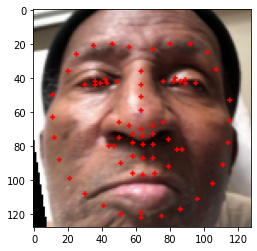

IndexError: 

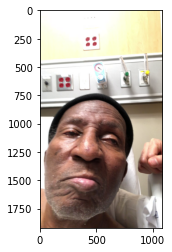

In [54]:
%%time
SIZE = 128
WIDTH = None
ALIGN_METHOD = 'face_chip'

height,width,_ = frames[0].shape
video_name = 'smile_test.avi'
video = cv2.VideoWriter(video_name, 0, 24, (SIZE,SIZE))
selected_landmarks = -1

pi = ProcessImage(predictor,detector,shape_predictor)


for f in frames:
    plt.imshow(f)
    rect,img, gray_img, face = pi.process(f,
                                     width = WIDTH,
                                     is_bgr = False,
                                     method = ALIGN_METHOD,
                                     size = SIZE)    


    img_drawn = draw_landmarks(face,
                              img,
                              gray_img,
                              selected_landmarks,
                              landmark_radius=SIZE//128)
    show_image_local(img_drawn)
   
    video.write(img_drawn)
    
cv2.destroyAllWindows()
video.release()

In [21]:
rect,img, gray_img, face = pi.process(f,
                                 width = WIDTH,
                                 is_bgr = False,
                                 method = ALIGN_METHOD,
                                 size = SIZE)    


IndexError: 

In [13]:
%%time
SIZE = 128
WIDTH = 800
ALIGN_METHOD = 'face_chip'

tic = time.time()
selected_landmarks = -1

pi = ProcessImage(predictor,detector,shape_predictor)


for f in frames:
    rect, img, gray_img, face = pi.process(f,
                                     width = WIDTH,
                                     is_bgr = False,
                                     method = ALIGN_METHOD,
                                     size = SIZE)    

    #show_image_local(img_drawn)
   
toc = time.time()

CPU times: user 9.79 s, sys: 655 ms, total: 10.4 s
Wall time: 3.77 s


In [14]:
pi.time_face_detector

1.5455784797668457

In [26]:
import cv2
import mediapipe as mp
import time
 

class FaceMeshDetector():
 
    def __init__(self, staticMode=False, maxFaces=1, minDetectionCon=0.5, minTrackCon=0.5):
 
        self.staticMode = staticMode
        self.maxFaces = maxFaces
        self.minDetectionCon = minDetectionCon
        self.minTrackCon = minTrackCon
 
        self.mpDraw = mp.solutions.drawing_utils
        self.mpFaceMesh = mp.solutions.face_mesh
        self.faceMesh = self.mpFaceMesh.FaceMesh(self.staticMode, self.maxFaces,
                                                 min_detection_confidence = self.minDetectionCon,
                                                 min_tracking_confidence = self.minTrackCon)
        self.drawSpec = self.mpDraw.DrawingSpec(thickness=1, circle_radius=2)
 
    def findFaceMesh(self, img, draw=True):
        self.imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.faceMesh.process(self.imgRGB)
        faces = []
        if self.results.multi_face_landmarks:
            for faceLms in self.results.multi_face_landmarks:
                if draw:
                    self.mpDraw.draw_landmarks(img, faceLms, self.mpFaceMesh.FACEMESH_CONTOURS,
                                           self.drawSpec, self.drawSpec)
                face = []
                for id,lm in enumerate(faceLms.landmark):
                    #print(lm)
                    ih, iw, ic = img.shape
                    x,y = int(lm.x*iw), int(lm.y*ih)
                    #cv2.putText(img, str(id), (x, y), cv2.FONT_HERSHEY_PLAIN,
                     #           0.7, (0, 255, 0), 1)
 
                    #print(id,x,y)
                    face.append([x,y])
                faces.append(face)
        return img, faces
 
 

In [27]:
%%time
detector = FaceMeshDetector(maxFaces=1)

drawn = []
for img in frames:
    #success, img = cap.read()
    img, faces = detector.findFaceMesh(cv2.cvtColor(img.numpy(),cv2.COLOR_RGB2BGR))
    
    drawn.append(img)
    #if len(faces)!= 0:
    #    print(faces[0])
    #cTime = time.time()
    #fps = 1 / (cTime - pTime)
    #pTime = cTime
    #show_image_local(img)
    #cv2.waitKey(1)

CPU times: user 1.34 s, sys: 110 ms, total: 1.45 s
Wall time: 1.38 s


# Run all Live

In [16]:
import cv2
import time
import uuid 
#Constants
WIDTH = 800
SIZE = 256
ALIGN_METHOD = None
OPTICAL_FLOW_THRESHOLD = 2
SAVE_VIDEO = True
TIME_DURATION = 15


#Init
selected_landmarks = -1
op = OpticalFlow(flow_threshold = OPTICAL_FLOW_THRESHOLD)
ofs = OpticalFlowSymmetry()
pi = ProcessImage(predictor,detector,shape_predictor)
uuid_ = str(uuid.uuid1()).split('-')[0]


#Prev frame processing
cap = cv2.VideoCapture(0)
        
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

_, frame_prev = cap.read()
original_frames = [frame_prev]

rect,frame_prev, gray_frame_prev, face_prev = pi.process(frame_prev,
                                                     width = WIDTH,
                                                     is_bgr = True,
                                                     method = ALIGN_METHOD,
                                                     size = SIZE)    


frame_drawn_prev = draw_landmarks(face_prev,
                                  frame_prev,
                                  gray_frame_prev,
                                  selected_landmarks,
                                  landmark_radius=SIZE//128)

processed_landmarks_prev = face_prev['landmarks']

    
of_temp = []
left_movement_temp = []
right_movement_temp = []
left_magnitudes_temp = []
right_magnitudes_temp = []
frames = []
num_frames = 0
time_start = time.time()

left_of_frames = []
right_of_frames = []


while time.time() < time_start + TIME_DURATION:

    #time.sleep(2)
    ret, frame = cap.read()
    
    original_frames.append(frame)

    rect,frame, gray_frame, face = pi.process(frame,
                                         width = WIDTH,
                                         is_bgr = True,
                                         method = ALIGN_METHOD,
                                         size = SIZE)    

    
    frame_drawn =  draw_landmarks(face,
                                  frame,
                                  gray_frame,
                                  selected_landmarks,
                                  landmark_radius=SIZE//128)
    
    
    processed_landmarks = face['landmarks']

    #Optical Flow
    re_prev = ROIExtractor(frame_prev,processed_landmarks_prev,debug=False)
    re = ROIExtractor(frame,processed_landmarks,debug=False)


    left_mouth_prev,left_mouth_prev_bounds = re_prev.left_mouth()
    right_mouth_prev,right_mouth_prev_bounds = re_prev.right_mouth()

    left_mouth,_ = re.left_mouth()
    right_mouth,_ = re.right_mouth()

    '''
    left_mouth,_ = re.left_mouth(project_to = left_project_coords)
    right_mouth,_ = re.right_mouth(project_to = right_project_coords)

    left_project_coords = [[left_mouth_prev_bounds[0],left_mouth_prev_bounds[2]],
                          [left_mouth_prev_bounds[1],left_mouth_prev_bounds[2]],
                          [left_mouth_prev_bounds[1],left_mouth_prev_bounds[3]],
                          [left_mouth_prev_bounds[0],left_mouth_prev_bounds[3]]]


    right_project_coords = [[right_mouth_prev_bounds[0],right_mouth_prev_bounds[2]],
                            [right_mouth_prev_bounds[1],right_mouth_prev_bounds[2]],
                            [right_mouth_prev_bounds[1],right_mouth_prev_bounds[3]],
                            [right_mouth_prev_bounds[0],right_mouth_prev_bounds[3]]]'''

    ##Size correction.
    left_mouth = cv2.resize(left_mouth,(left_mouth_prev.shape[1],left_mouth_prev.shape[0]))
    right_mouth = cv2.resize(right_mouth,(right_mouth_prev.shape[1],right_mouth_prev.shape[0]))                      

    
    left_magnitude, left_angle = op.compute_dense_flow(left_mouth_prev,left_mouth)
    left_magnitude = op.filter_flow_magnitude_noise(left_magnitude)
    left_rgb_of = op.get_rgb_optical_flow(left_magnitude, left_angle)

    right_magnitude, right_angle = op.compute_dense_flow(right_mouth_prev,right_mouth)
    right_magnitude = op.filter_flow_magnitude_noise(right_magnitude)
    right_rgb_of = op.get_rgb_optical_flow(right_magnitude, right_angle)
    
    left_of_frames.append(left_rgb_of)
    right_of_frames.append(right_rgb_of)
    
    left_movement_score = ofs.movement_score([left_magnitude])
    right_movement_score = ofs.movement_score([right_magnitude])


    of_mouth_symmetry_score = ofs.symmetry_score([left_magnitude],[right_magnitude],lambda_=10,ret='abs_diff')

    #Append to temporal lists
    of_temp.append(of_mouth_symmetry_score)
    right_movement_temp.append(right_movement_score)
    left_movement_temp.append(left_movement_score)
    right_magnitudes_temp.append(right_magnitude)
    left_magnitudes_temp.append(left_magnitude)


    nose_mouth_features_ = nose_mouth_features(processed_landmarks)

    lmnx,lmny,lmnd,theta,rmnx,rmny,rmnd,phi = nose_mouth_features_

    h_eb_eb_devs = h_eyebrow_eyebrow_deviation(processed_landmarks, 
                            exclude=[0,1,2])
    h_eb_eb_devs = np.round(h_eb_eb_devs,2)


    bo = BarycentricOperations(landmarks_left_to_right_mapping,
                       triangle_indices = [68,69,70])
    barycentric_asymmetry = bo.global_asymmetry_index(
    processed_landmark_dict_to_array(processed_landmarks))


    data_annotator = annotate_data(initial_h=int(frame.shape[0]*.1), interval_h=int(frame.shape[0]*.1))
    #frame_drawn = data_annotator.annotate(frame_drawn,'theta',round(theta))
    #frame_drawn = data_annotator.annotate(frame_drawn,'phi',round(phi))
    #frame_drawn = data_annotator.annotate(frame_drawn,'h_eb_dev',h_eb_eb_devs)
    #frame_drawn = data_annotator.annotate(frame_drawn,'b_asymmetry',round(barycentric_asymmetry,2))
    frame_drawn = data_annotator.annotate(frame_drawn,'of_m_s',round(of_mouth_symmetry_score,5))

    cv2.imshow('Input', frame_drawn)
    
    
    frames.append(frame_drawn)
    
    num_frames+=1

    c = cv2.waitKey(1)
    if c == 27:
        break
       
    # Updates previous frame info
    frame_prev = frame
    gray_frame_prev = gray_frame 
    frame_drawn_prev,face_prev = frame_drawn,face
    processed_landmarks_prev = processed_landmarks

fps = round(num_frames/TIME_DURATION)


# The following frees up resources and closes all windows
destroy_all_cam_windows(cap)


In [380]:

#Save Videos
height = width = SIZE
video_name = f'created_videos/processed_video_{uuid_}.avi'
video = cv2.VideoWriter(video_name, 0, fps, (SIZE,SIZE))

if SAVE_VIDEO:
    for i in frames:
        video.write(i)
        

#Save Videos
height, width,_ = original_frames[0].shape
video_name = f'created_videos/raw_video_{uuid_}.avi'
video = cv2.VideoWriter(video_name, 0, fps, (width,height))

if SAVE_VIDEO:
    for i in original_frames:
        video.write(i)

        
        
left_of_frames = [cv2.resize(i,(114,114)) for i in left_of_frames]
right_of_frames = [cv2.resize(i,(114,114)) for i in right_of_frames]


#Save Videos
height = width = SIZE
video_name = f'created_videos/left_mouth_{uuid_}.avi'
video = cv2.VideoWriter(video_name, 0, fps, (114,114))

if SAVE_VIDEO:
    for i in left_of_frames:
        video.write(i)


#Save Videos
height = width = SIZE
video_name = f'created_videos/right_mouth_{uuid_}.avi'
video = cv2.VideoWriter(video_name, 0, fps, (114,114))

if SAVE_VIDEO:
    for i in right_of_frames:
        video.write(i)


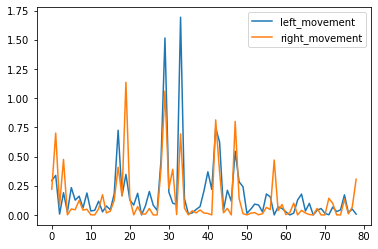

In [25]:
plt.plot(left_movement_temp,label='left_movement')
plt.plot(right_movement_temp,label='right_movement')
plt.legend()
plt.show()

No handles with labels found to put in legend.


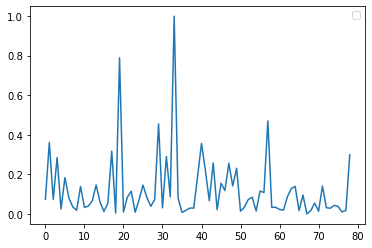

In [26]:
plt.plot(of_temp)
plt.legend()
plt.show()

# Run all Video

In [40]:
import cv2
import time
import uuid 
#Constants
WIDTH = 800
SIZE = 256
ALIGN_METHOD = None
OPTICAL_FLOW_THRESHOLD = 2
SAVE_VIDEO = True
TIME_DURATION = 15


#Init
selected_landmarks = -1
op = OpticalFlow(flow_threshold = OPTICAL_FLOW_THRESHOLD)
ofs = OpticalFlowSymmetry()
pi = ProcessImage(predictor,detector,shape_predictor)
uuid_ = str(uuid.uuid1()).split('-')[0]


#Prev frame processing
cap = cv2.VideoCapture(0)
        
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

frame_prev = frames[0]
original_frames = [frame_prev]

rect,frame_prev, gray_frame_prev, face_prev = pi.process(frame_prev,
                                                     width = WIDTH,
                                                     is_bgr = True,
                                                     method = ALIGN_METHOD,
                                                     size = SIZE)    


frame_drawn_prev = draw_landmarks(face_prev,
                                  frame_prev,
                                  gray_frame_prev,
                                  selected_landmarks,
                                  landmark_radius=SIZE//128)

processed_landmarks_prev = face_prev['landmarks']

    
of_temp = []
left_movement_temp = []
right_movement_temp = []
left_magnitudes_temp = []
right_magnitudes_temp = []
num_frames = 0
time_start = time.time()

left_of_frames = []
right_of_frames = []
frames_drawn = []

for frame in frames:
    original_frames.append(frame)

    rect,frame, gray_frame, face = pi.process(frame,
                                         width = WIDTH,
                                         is_bgr = True,
                                         method = ALIGN_METHOD,
                                         size = SIZE)    

    
    frame_drawn =  draw_landmarks(face,
                                  frame,
                                  gray_frame,
                                  selected_landmarks,
                                  landmark_radius=SIZE//128)
    
    
    processed_landmarks = face['landmarks']

    #Optical Flow
    re_prev = ROIExtractor(frame_prev,processed_landmarks_prev,debug=False)
    re = ROIExtractor(frame,processed_landmarks,debug=False)


    left_mouth_prev,left_mouth_prev_bounds = re_prev.left_mouth()
    right_mouth_prev,right_mouth_prev_bounds = re_prev.right_mouth()

    left_mouth,_ = re.left_mouth()
    right_mouth,_ = re.right_mouth()

    '''
    left_mouth,_ = re.left_mouth(project_to = left_project_coords)
    right_mouth,_ = re.right_mouth(project_to = right_project_coords)

    left_project_coords = [[left_mouth_prev_bounds[0],left_mouth_prev_bounds[2]],
                          [left_mouth_prev_bounds[1],left_mouth_prev_bounds[2]],
                          [left_mouth_prev_bounds[1],left_mouth_prev_bounds[3]],
                          [left_mouth_prev_bounds[0],left_mouth_prev_bounds[3]]]


    right_project_coords = [[right_mouth_prev_bounds[0],right_mouth_prev_bounds[2]],
                            [right_mouth_prev_bounds[1],right_mouth_prev_bounds[2]],
                            [right_mouth_prev_bounds[1],right_mouth_prev_bounds[3]],
                            [right_mouth_prev_bounds[0],right_mouth_prev_bounds[3]]]'''

    ##Size correction.
    left_mouth = cv2.resize(left_mouth,(left_mouth_prev.shape[1],left_mouth_prev.shape[0]))
    right_mouth = cv2.resize(right_mouth,(right_mouth_prev.shape[1],right_mouth_prev.shape[0]))                      

    
    left_magnitude, left_angle = op.compute_dense_flow(left_mouth_prev,left_mouth)
    left_magnitude = op.filter_flow_magnitude_noise(left_magnitude)
    left_rgb_of = op.get_rgb_optical_flow(left_magnitude, left_angle)

    right_magnitude, right_angle = op.compute_dense_flow(right_mouth_prev,right_mouth)
    right_magnitude = op.filter_flow_magnitude_noise(right_magnitude)
    right_rgb_of = op.get_rgb_optical_flow(right_magnitude, right_angle)
    
    left_of_frames.append(left_rgb_of)
    right_of_frames.append(right_rgb_of)
    
    left_movement_score = ofs.movement_score([left_magnitude])
    right_movement_score = ofs.movement_score([right_magnitude])


    of_mouth_symmetry_score = ofs.symmetry_score([left_magnitude],[right_magnitude],lambda_=10,ret='abs_diff')

    #Append to temporal lists
    of_temp.append(of_mouth_symmetry_score)
    right_movement_temp.append(right_movement_score)
    left_movement_temp.append(left_movement_score)
    right_magnitudes_temp.append(right_magnitude)
    left_magnitudes_temp.append(left_magnitude)


    nose_mouth_features_ = nose_mouth_features(processed_landmarks)

    lmnx,lmny,lmnd,theta,rmnx,rmny,rmnd,phi = nose_mouth_features_

    h_eb_eb_devs = h_eyebrow_eyebrow_deviation(processed_landmarks, 
                            exclude=[0,1,2])
    h_eb_eb_devs = np.round(h_eb_eb_devs,2)


    bo = BarycentricOperations(landmarks_left_to_right_mapping,
                       triangle_indices = [68,69,70])
    barycentric_asymmetry = bo.global_asymmetry_index(
    processed_landmark_dict_to_array(processed_landmarks))


    data_annotator = annotate_data(initial_h=int(frame.shape[0]*.1), interval_h=int(frame.shape[0]*.1))
    #frame_drawn = data_annotator.annotate(frame_drawn,'theta',round(theta))
    #frame_drawn = data_annotator.annotate(frame_drawn,'phi',round(phi))
    #frame_drawn = data_annotator.annotate(frame_drawn,'h_eb_dev',h_eb_eb_devs)
    #frame_drawn = data_annotator.annotate(frame_drawn,'b_asymmetry',round(barycentric_asymmetry,2))
    frame_drawn = data_annotator.annotate(frame_drawn,'of_m_s',round(of_mouth_symmetry_score,5))

    cv2.imshow('Input', frame_drawn)
    
    
    frames_drawn.append(frame_drawn)
    
    num_frames+=1

    c = cv2.waitKey(1)
    if c == 27:
        break
       
    # Updates previous frame info
    frame_prev = frame
    gray_frame_prev = gray_frame 
    frame_drawn_prev,face_prev = frame_drawn,face
    processed_landmarks_prev = processed_landmarks

fps = round(num_frames/TIME_DURATION)



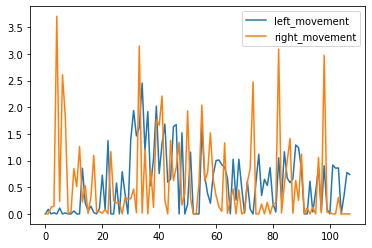

In [41]:
plt.plot(left_movement_temp,label='left_movement')
plt.plot(right_movement_temp,label='right_movement')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


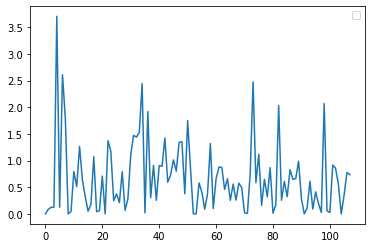

In [43]:
plt.plot(of_temp)
plt.legend()
plt.show()

In [42]:
v

NameError: name 'v' is not defined